# Procesamiento de imágenes con Python y SciPy
Python provee diferentes librerías para la manipulación de imágenes, a través de NumPy como arreglos multidimensionales a través de PIL - Python Imagin Library, actualmente se trabaja como la librería Pillow que es un fork (bifurcación de código) de la librería original PIL.
Veamos un ejemplo de Pillow

In [3]:
#Correr para instalar Pillow
!pip install Pillow

In [49]:
import os
from PIL import Image as pil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

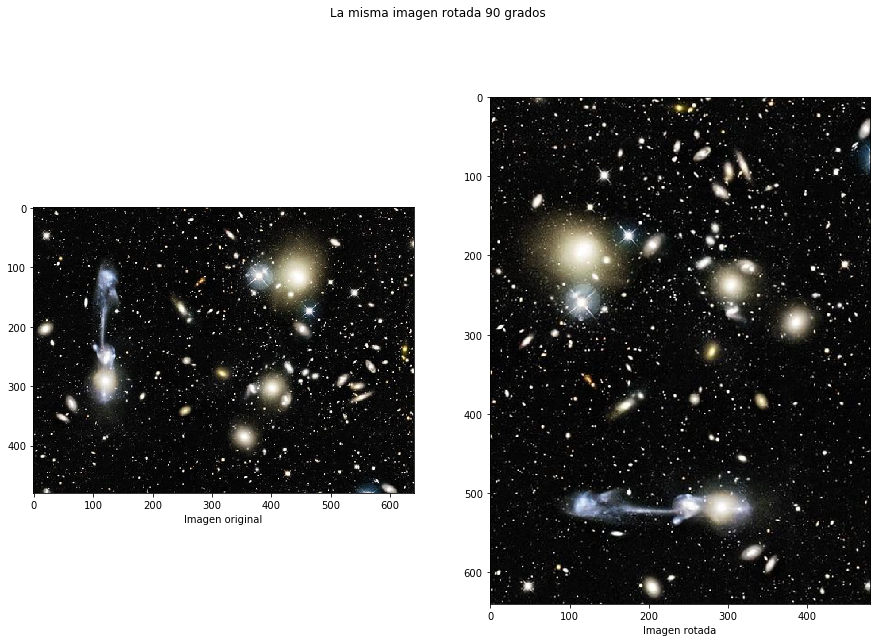

In [53]:
myimage = pil.open('abell1185_cfht.jpg')

mirror = myimage.transpose(pil.ROTATE_90)
outfilename = os.path.splitext(os.path.basename('abell1185_cfht.jpg'))[0]+'_r90.png'
mirror.save(outfilename)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle('La misma imagen rotada 90 grados')

img = mpimg.imread('abell1185_cfht.jpg')
img2 = mpimg.imread('abell1185_cfht_r90.png')

ax1.imshow(img)
ax1.set_xlabel('Imagen original')
ax2.imshow(img2)
ax2.set_xlabel('Imagen rotada')
plt.show()

También podemos girar la image en X con la función `mirror`

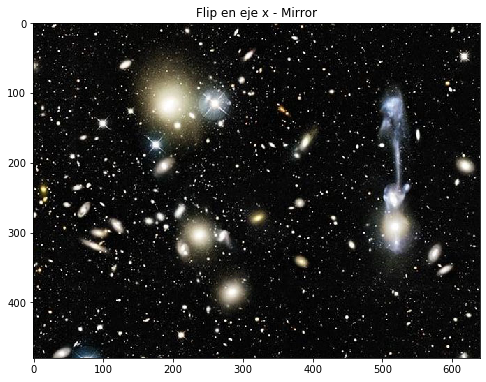

In [71]:
mirror = myimage.transpose(pil.FLIP_LEFT_RIGHT)
plt.figure(figsize=(8,10))
plt.imshow(mirror)
plt.title('Flip en eje x - Mirror')
plt.show()

O realizar ambas operaciones en un solo paso con

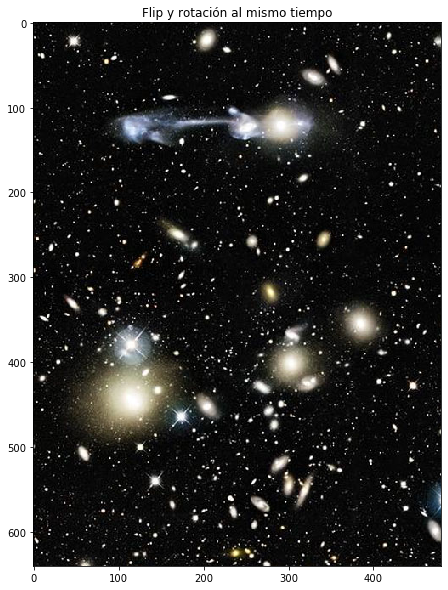

In [72]:
mirror_flip = myimage.transpose(pil.FLIP_LEFT_RIGHT).transpose(pil.ROTATE_90)
plt.figure(figsize=(8,10))
plt.title('Flip y rotación al mismo tiempo')
plt.imshow(mirror_flip)

El procesamiento se puede realizar en otros tipos de archivos que no sean .png. Muchas de las funciones de PIL/Pillow se encuentran disponibles para utilizarlas como procesamiento numérico con el paquete de `SciKit Image`. Veamos algunos ejemplos en la siguiente sección

## SciKit Image
SciKit Image es un conjunto de herramientas construida sobre SciPy y Numpy, entre estas `scikit-image`, para procesamiento de imágenes en Python. Está orientado a extraer información de imágenes y para escribir, leer, y modificar imágenes. Es comparable a otras herramientas de procesamiento como OpenCV.

Para instalar el paquete de SciKit Image debemos correr

`!pip install scikit-image`

In [73]:
!pip install scikit-image

  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)


In [74]:
#importar paquetes
import skimage.io
import numpy as np

In [76]:
#mostrar un diccionario de las librerías disponibles para leer diferentes tipos de archivos
skimage.io.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}

In [80]:
#ademas podemos ver las diferente librerías llamando las diferentes llaves, recuerden como llamar a un diccionario
imlibs = skimage.io.find_available_plugins()
imlibs['fits']

['imread', 'imread_collection']

In [81]:
imlibs['pil']

['imread', 'imsave', 'imread_collection']

In [107]:
#con este imgread leemos la image como un arreglo de numpy, en RGB
mimagen = skimage.io.imread('m50_kc.jpg').astype(np.float32)
#mimagen

In [108]:
#tamaño de la imagen, y 3 canales RGB
mimagen.shape

(391, 510, 3)

In [110]:
#podemos leer la imagen como una imagen en escala de grises con el argumento as_gray=True
#lo leemos como float de 32 bits para poder leerlo con matplotlib más adelante
mimagen_gris = skimage.io.imread('m50_kc.jpg', as_gray=True).astype(np.float32)
mimagen_gris

array([[0.01402745, 0.01122196, 0.00841647, ..., 0.01028274, 0.01083333,
        0.01389882],
       [0.01402745, 0.01122196, 0.00561098, ..., 0.00778275, 0.00944941,
        0.01139882],
       [0.01122196, 0.00841647, 0.00280549, ..., 0.00611608, 0.00723216,
        0.00918157],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8606153 , 0.44777215,
        0.00583333],
       [0.        , 0.        , 0.        , ..., 0.16257608, 0.02258314,
        0.01311098],
       [0.        , 0.        , 0.        , ..., 0.06258745, 0.06150902,
        0.09041922]], dtype=float32)

In [111]:
mimagen_gris.shape

(391, 510)

mimagen_gris[2]

Podemos guardar nuestra imagen con `skimage.io.imsave(nombre_archivo, nparray)`

In [113]:
skimage.io.imsave('m50_gris.jpg', mimagen_gris)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


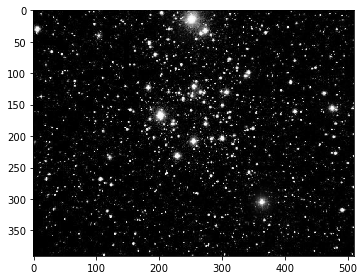

In [114]:
#mostrar nuestra imagen
skimage.io.imshow(mimagen_gris)
skimage.io.show()

## Programa de ejemplo - identificar estrellas en una imagen
A continuación repasaremos un ejemplo de lo que podemos hacer con SciKit-Image. Basado en los ejemplos de la documentación de SciKit-Image

In [118]:
!pip install astropy

In [136]:
#importar librerías
import os
import sys
import argparse
import matplotlib.pyplot as mpl
import numpy as np
import astropy.io.fits as pyfits

In [137]:
img = pyfits.getdata('m35_40min_red/m35_40min_red.fits')
img

array([[ 4091,  4626,  4863, ...,  4922,  4685,  4566],
       [ 4210,  4744,  4744, ...,  4804,  4804,  4566],
       [ 4685,  5219,  4744, ...,  4566,  4566,  4566],
       ...,
       [15025, 10275,  7187, ...,  4658,  4658,  4421],
       [13778,  9978,  7128, ...,  4421,  4658,  4302],
       [10690,  8078,  6178, ...,  4658,  4421,  4064]], dtype=int16)

In [138]:
#Tomar solo una parte de la imagen
img[1000:3000, 1000:3000]

array([[ 4986,  4867,  4867, ...,  4753,  4753,  4278],
       [ 5105,  4867,  4867, ...,  4753,  4991,  4753],
       [ 4867,  5105,  5105, ...,  4991,  5228,  4991],
       ...,
       [ 6748,  7698, 10073, ...,  4658,  4658,  4421],
       [ 5264,  6035,  7460, ...,  4421,  4658,  4302],
       [ 4076,  5085,  6035, ...,  4658,  4421,  4064]], dtype=int16)

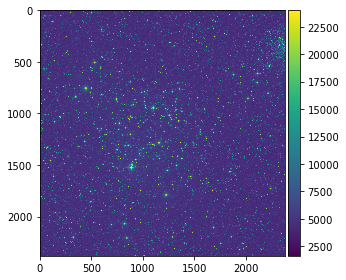

In [139]:
skimage.io.imshow(img)
skimage.io.show()

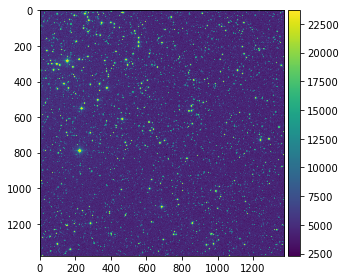

In [140]:
skimage.io.imshow(img[1000:3000, 1000:3000])
skimage.io.show()

Limitamos los valores máximos y mínimos de nuestra región de interés

C:\Users\murip\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


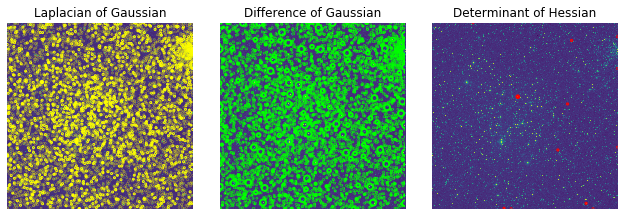

In [141]:
image = img[1000:3000, 1000:3000]
image_gray = rgb2gray(image)

#Laplaciano de Gausiano - log
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

#Computar radios en la tercera columna
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

#Diferencia de gausianos - Difference of Gaussian (dog)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

#Determinante de Hessiano - Determinant of Hessian (doh)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

C:\Users\murip\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


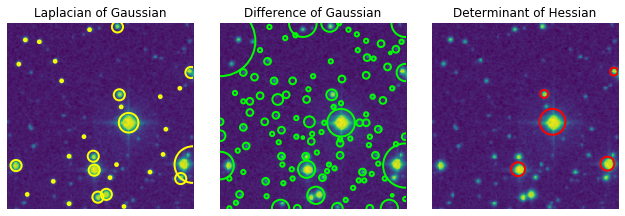

In [157]:
image = img[400:600, 400:600]
image_gray = rgb2gray(image)

#Laplaciano de Gausiano - log
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

#Computar radios en la tercera columna
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

#Diferencia de gausianos - Difference of Gaussian (dog)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.01)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

#Determinante de Hessiano - Determinant of Hessian (doh)
blobs_doh = blob_doh(image_gray, min_sigma=1, max_sigma=30, threshold=.008)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

## Ejemplo con Hubble Deep Field

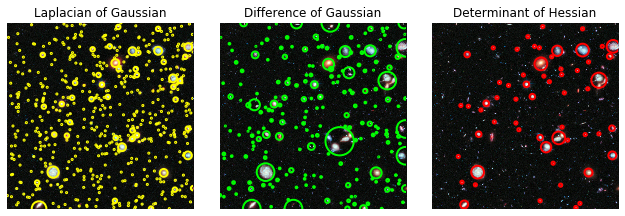

In [135]:
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

#Laplaciano de Gausiano - log
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

#Computar radios en la tercera columna
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

#Diferencia de gausianos - Difference of Gaussian (dog)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

#Determinante de Hessiano - Determinant of Hessian (doh)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()